In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [28]:
# Upload CSV to Colab and update path if needed
df = pd.read_csv("rolling_stones_spotify.csv")

df.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [29]:
print("Shape:", df.shape)
df.info()

Shape: (1610, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 n

In [30]:
df.describe()

,Unnamed: 0,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,804.500000,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,464.911282,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,0.000000,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,402.250000,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,804.500000,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,1206.750000,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,1609.000000,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


In [31]:
df.isnull().sum()

,0
Unnamed: 0,0
name,0
album,0
release_date,0
track_number,0
id,0
uri,0
acousticness,0
danceability,0
energy,0


In [32]:
# Drop rows with missing values (if any)
df = df.dropna()

In [33]:
df.duplicated(subset="id").sum()

np.int64(0)

In [34]:
df = df.drop_duplicates(subset="id")

In [35]:
# Convert release_date to datetime
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")

# Extract release year
df["release_year"] = df["release_date"].dt.year

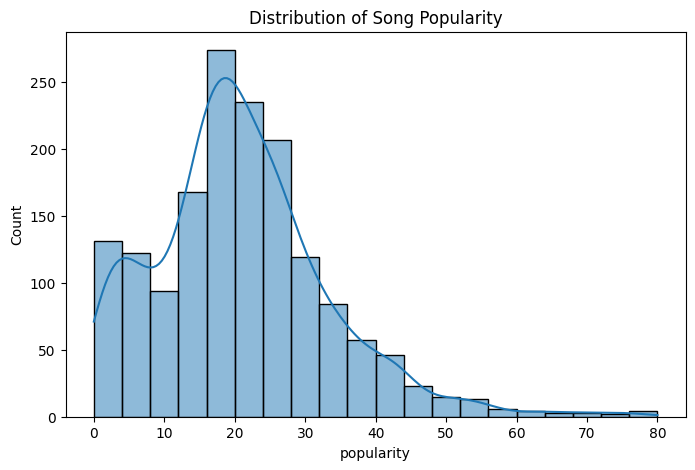

In [36]:
plt.figure(figsize=(8,5))
sns.histplot(df["popularity"], bins=20, kde=True)
plt.title("Distribution of Song Popularity")
plt.show()

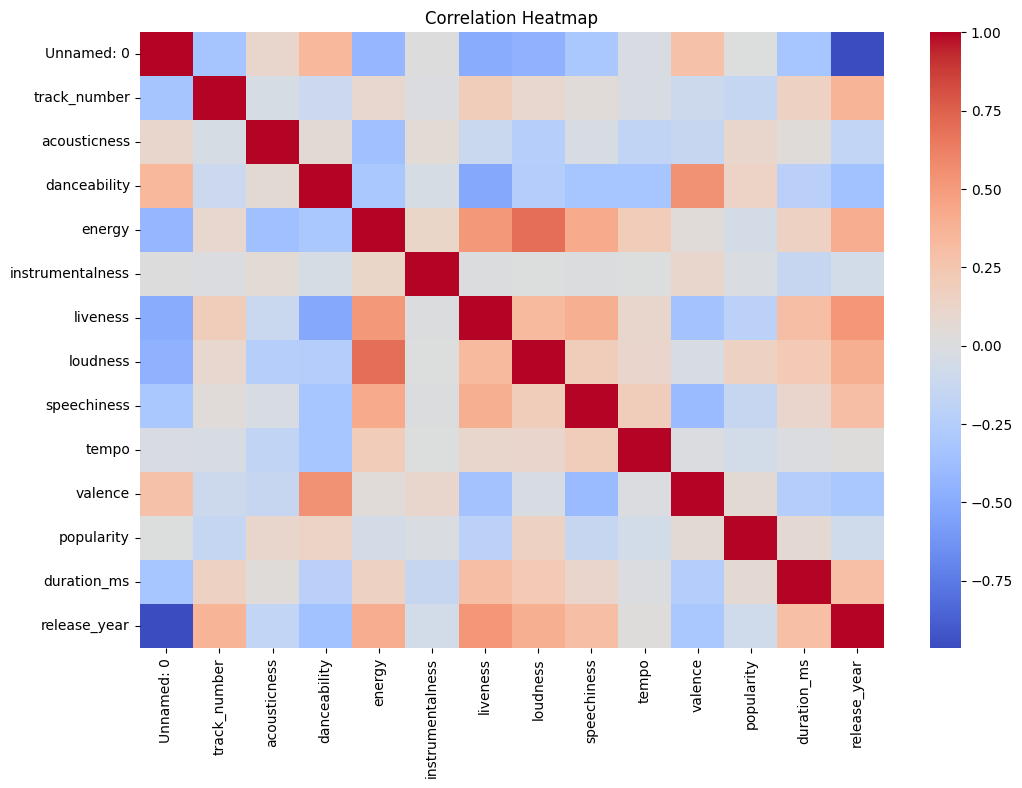

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(np.number).corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

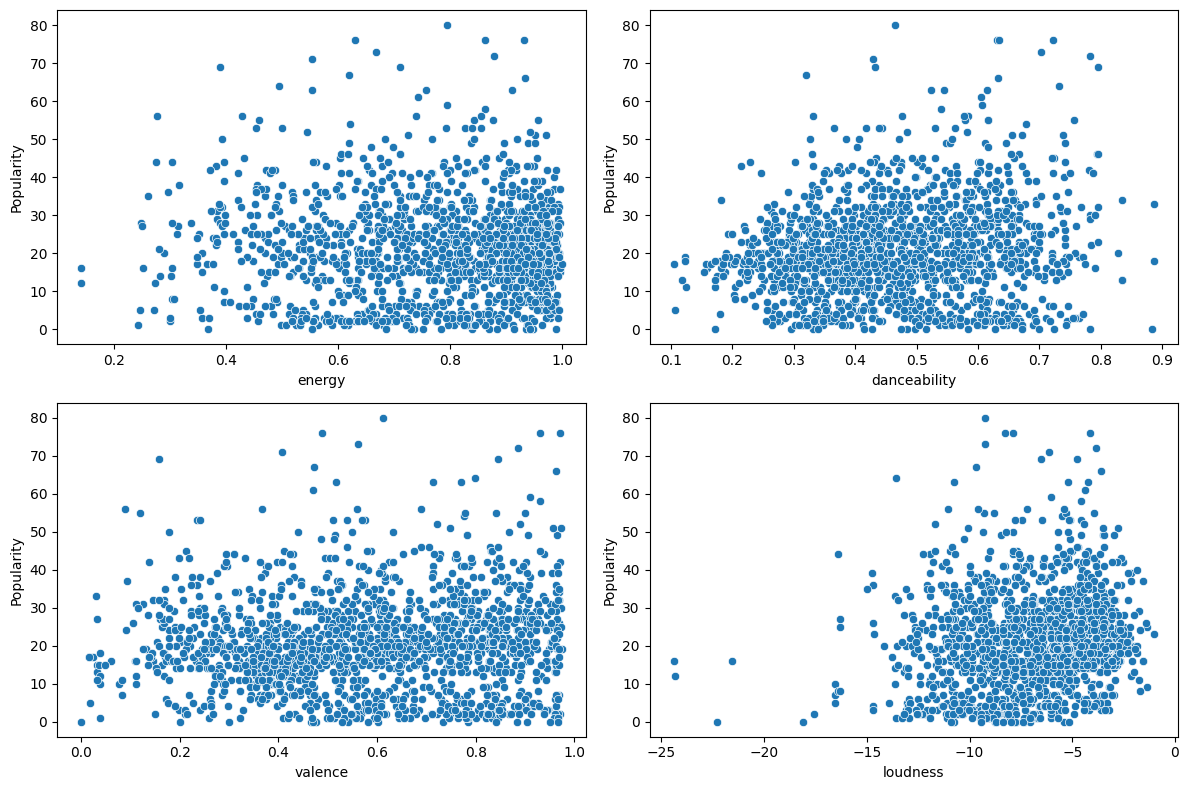

In [38]:
features = ["energy", "danceability", "valence", "loudness"]

plt.figure(figsize=(12,8))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=df[col], y=df["popularity"])
    plt.xlabel(col)
    plt.ylabel("Popularity")
plt.tight_layout()
plt.show()

In [39]:
# Define popular songs (top 25%)
popularity_threshold = df["popularity"].quantile(0.75)

popular_songs = df[df["popularity"] >= popularity_threshold]

In [40]:
album_popularity = popular_songs["album"].value_counts().head(10)

album_popularity

,count
album,
Honk (Deluxe),18
Exile On Main Street (2010 Re-Mastered),18
Exile On Main Street (Deluxe Version),18
Licked Live In NYC,17
Live At The El Mocambo,14
Voodoo Lounge (Remastered 2009),14
Blue & Lonesome,12
The Rolling Stones,12
Out Of Our Heads,12


### 📌 Album Recommendation Insight

Based on the number of popular songs (defined as songs in the top 25% of popularity),
the following two albums should be recommended to new listeners:

- **Honk (Deluxe)**
- **Exile On Main Street (2010 Re-Mastered)**

These albums contain the highest concentration of popular tracks, indicating strong
listener preference and consistent performance across songs.


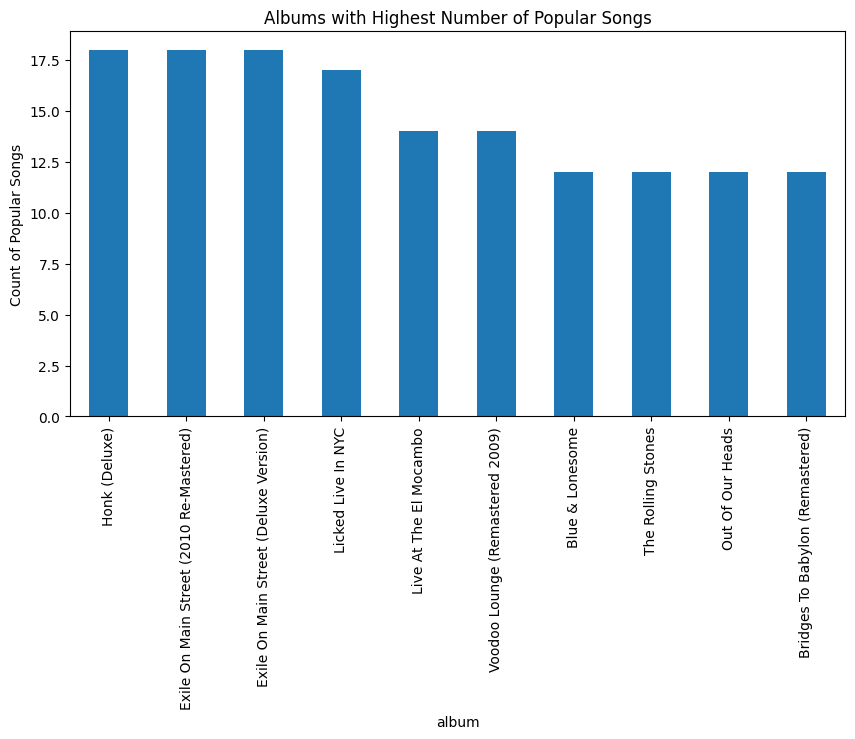

In [41]:
plt.figure(figsize=(10,5))
album_popularity.plot(kind="bar")
plt.title("Albums with Highest Number of Popular Songs")
plt.ylabel("Count of Popular Songs")
plt.show()

In [42]:
features_for_clustering = [
    "acousticness", "danceability", "energy",
    "instrumentalness", "liveness", "loudness",
    "speechiness", "tempo", "valence", "duration_ms"
]

X = df[features_for_clustering]

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.30326096 0.16514826]


### 🔍 Significance of Dimensionality Reduction (PCA)

The dataset contains multiple audio features that are often correlated
(e.g., energy, loudness, danceability).

Principal Component Analysis (PCA) helps to:
- Reduce high-dimensional data into fewer components
- Preserve maximum variance in the data
- Remove multicollinearity among features
- Enable clear visualization of song similarities

Using PCA allows us to visually inspect how songs group together
and improves the effectiveness and interpretability of clustering.


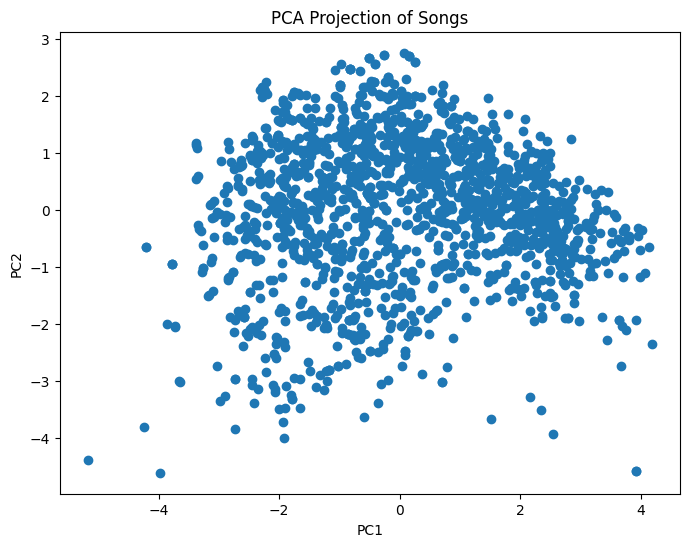

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title("PCA Projection of Songs")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [46]:
inertia = []

for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

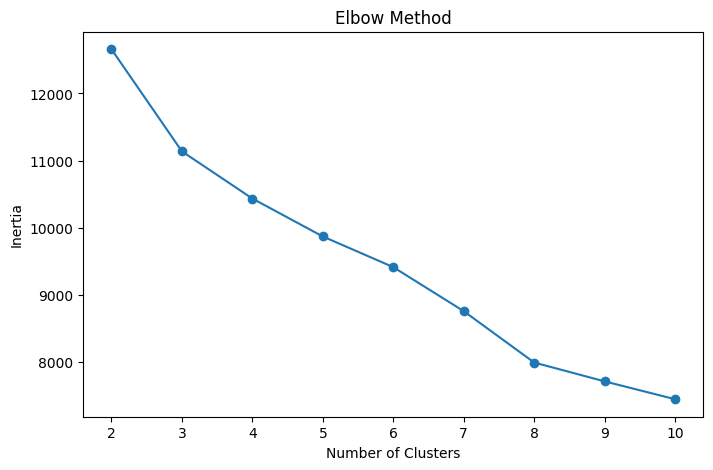

In [47]:
plt.figure(figsize=(8,5))
plt.plot(range(2,11), inertia, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [48]:
for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, Silhouette Score={score:.3f}")

k=2, Silhouette Score=0.202
k=3, Silhouette Score=0.169
k=4, Silhouette Score=0.135
k=5, Silhouette Score=0.145
k=6, Silhouette Score=0.130


In [49]:
kmeans = KMeans(n_clusters=4, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

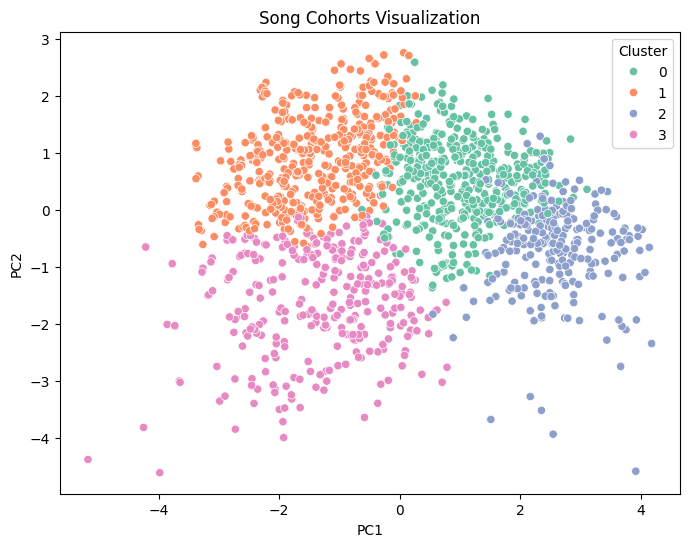

In [50]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["cluster"], palette="Set2")
plt.title("Song Cohorts Visualization")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

In [51]:
cluster_summary = df.groupby("cluster")[features_for_clustering + ["popularity"]].mean()
cluster_summary

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,popularity
cluster,,,,,,,,,,,
0,0.152442,0.406414,0.901076,0.154457,0.705607,-5.483144,0.067977,134.027212,0.596701,251928.938144,19.164948
1,0.213671,0.595289,0.767117,0.218140,0.221641,-7.601935,0.047236,121.991565,0.797724,215257.086207,22.614943
2,0.222331,0.334611,0.944242,0.172073,0.876151,-5.245570,0.145030,136.456468,0.332118,356045.343396,18.075472
3,0.470048,0.468462,0.556231,0.088560,0.300559,-9.487246,0.046911,112.864834,0.424447,254597.621302,22.423077


In [52]:
cluster_summary

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms,popularity
cluster,,,,,,,,,,,
0,0.152442,0.406414,0.901076,0.154457,0.705607,-5.483144,0.067977,134.027212,0.596701,251928.938144,19.164948
1,0.213671,0.595289,0.767117,0.218140,0.221641,-7.601935,0.047236,121.991565,0.797724,215257.086207,22.614943
2,0.222331,0.334611,0.944242,0.172073,0.876151,-5.245570,0.145030,136.456468,0.332118,356045.343396,18.075472
3,0.470048,0.468462,0.556231,0.088560,0.300559,-9.487246,0.046911,112.864834,0.424447,254597.621302,22.423077


### 🎧 Cluster Interpretation and Insights

- **Cluster 0:**  
  High energy and loudness with moderate danceability. These songs represent
  classic high-intensity rock tracks.

- **Cluster 1:**  
  Higher acousticness and lower energy, indicating softer and more mellow songs.

- **Cluster 2:**  
  High danceability and valence, suggesting upbeat and rhythm-friendly tracks.

- **Cluster 3:**  
  Higher liveness values, indicating live performance recordings with audience presence.

Each cluster represents a distinct cohort of songs based on musical characteristics,
making them suitable for targeted recommendations.


### ✅ Final Conclusion

In this project, exploratory data analysis and clustering techniques were applied
to create meaningful cohorts of Rolling Stones songs using Spotify audio features.

Key findings include:
- Identification of albums with the highest number of popular songs for recommendation
- Strong relationships between popularity and features such as energy and loudness
- Effective use of PCA for dimensionality reduction and visualization
- Formation of distinct song cohorts using KMeans clustering

These cohorts can be used to enhance personalized music recommendations
by grouping songs with similar musical attributes.
